In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

# Splitting the Dataset

In [2]:
#Loading the dataset
housing = fetch_california_housing()

In [3]:
#Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

In [4]:
#Creating training and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [5]:
#Normalizing the training, validation and testing features using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

# Creating MLP Model using Keras Sequential API

In [6]:
#Creating MLP model for Regression using Sequential API
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [7]:
#Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Viewing layers of the model
model.layers

## Compiling the Model

In [9]:
#Compiling the model 
model.compile(
    loss = "mse", #Since mse is the best metric for regression tasks
    optimizer = "sgd", #Using SGD backpropogation for optimization
    metrics = ["mean_squared_error"]
)

# Training the Model

In [10]:
#Training the model by fitting on the training data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3843 - mean_squared_error: 1.3843 - val_loss: 4.3598 - val_mean_squared_error: 4.3598
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4455 - mean_squared_error: 1.4455 - val_loss: 4.8854 - val_mean_squared_error: 4.8854
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 3.6657 - mean_squared_error: 3.6657 - val_loss: 0.5398 - val_mean_squared_error: 0.5398
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5017 - mean_squared_error: 0.5017 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4318 - mean_squared_error: 0.4318 - val_loss: 0.4732 - val_mean_squared_error: 0.4732
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4210 - mean_squared_error: 0.4210 - val_loss: 0.4873 - val_mean_squared_error: 0.4873
Epoch 7/20
363/363 [========

In [11]:
#Viewing the parameters
history.params

{'epochs': 20, 'steps': 363, 'verbose': 1}

# Plotting Learning Curve for Fitted Model

In [12]:
#Using pandas to convert obtained loss and extra parameters into dataframe
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.910005,0.910005,4.359809,4.359809
1,4.695213,4.695213,4.885449,4.885449
2,4.604633,4.604633,0.539790,0.539790
3,0.488167,0.488167,0.484912,0.484912
4,0.437203,0.437203,0.473202,0.473202


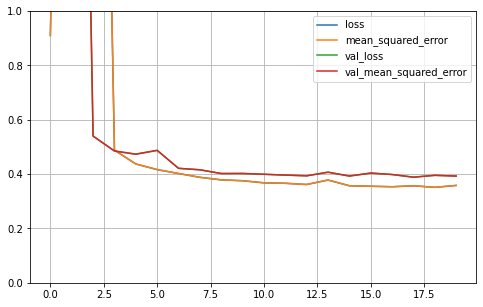

In [13]:
#Plotting a graph for learning curve using obtained dataframe
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating Model

In [14]:
#Evaluating the modelfor the test set
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 877us/step - loss: 5.6890 - mean_squared_error: 5.6890


[5.689014434814453, 5.689014434814453]

# Predicting the Labels using Trained Model

In [15]:
#Creating instances from the test set
X_new = X_test[:3]
X_new

array([[ 2.10708926, -1.00756409,  1.51241236, -0.08671505,  0.66214331,
         0.18706144, -0.89511392,  0.78353885],
       [ 1.238398  , -0.1317166 ,  0.66679587,  0.05685598,  0.23336288,
        -0.17220101, -0.63985784,  0.12849584],
       [-0.88504576,  0.42564089,  0.01490287, -0.22084261, -0.38557235,
         0.26260364,  0.48515969,  0.02348895]])

In [16]:
#Computing the class probabilities for the new set
y_proba = model.predict(X_new)

In [17]:
#Viewing the class probabilities
y_proba.round(2)

array([[3.23],
       [5.61],
       [0.53]], dtype=float32)

In [18]:
#Viewing whether the regressor correctly identified the labels
y_new = y_test[:3]
y_new

array([3.905  , 5.00001, 0.634  ])